<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
from torch import nn #nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

In [17]:
torch.__version__

'2.5.1+cu121'

In [32]:
#known parameters
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10],y[:10],X.device

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 device(type='cpu'))

In [19]:
len(X),len(y)

(50, 50)

##Splitting the data into training and test sets

training set is 80% of the total data

testing set is rest 20%

**Phases**:   training set -> Validation test ->testing set

validation test is not always done but train/test is always done

In [20]:
#create a train/test split
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

By default, if you don't call plt.figure(), Matplotlib will create a figure automatically when you start plotting.
However, explicitly using plt.figure() gives you more control over the figure's properties, like its size, resolution, and other settings.
You can create multiple figures and switch between them using plt.figure(figure_number), where figure_number is an integer.
In summary: plt.figure() is used to create and manage figures in Matplotlib, which serve as containers for your plots. It helps you organize and customize your visualizations.

In [21]:
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):

    plt.scatter(train_data, train_label, c="b", s=4, label="Training Data")
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing Data")

    if predictions is not None:
      plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 8})

    plt.show()



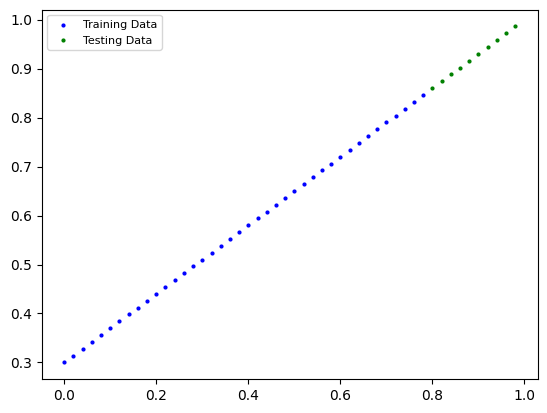

In [22]:
plot_predictions() #Here blue dots are the training sets and green is test sets

**2.BUILDING A MODEL**

our first Pytorch Model

Syntax for defining return type

def function_name(parameters:parameter_type) -> return_type:
   
    return value

In [23]:
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    #Initialize Model parameters
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #randn means random variables with normal distributiong form ie mean 0 and standard deviation 1
    #requires_grad is already initialized as True int nn.Parameters function
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    #forward() defines the computation in the model
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weights * x + self.bias
#

requires_grad=True is necessary for parameters that need to be updated during training.
It allows PyTorch to compute gradients automatically via backpropagation.
For machine learning models, this is crucial

**Pytorch model essentials**

* torch.nn- Contains all of the buildings for computational graphs
* torch.nn.Parameters-what parameters should our model try and learn
* torch.nn.Module-The base class for all neural network modules, if you subclass it you should overrise forward()
* torch.optim-this is where the optimizers live,they will help in gradient descent
* def forward() -All nn.Module subclass require you to use forward(), this is used to define what the module has to do

In [24]:
#create a tp model
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0

LinearRegressionModel()

In [25]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

**MAKING PREDICTIONS USING torch.inference_mode()**

we check our models predictive power using inference_mode,we will do it by finding y_preds which will be the predicted y values of our model

InferenceMode is a context manager analogous to no_grad to be used when you are certain your operations will have no interactions with autograd (e.g., model training). Code run under this mode gets better performance by disabling view tracking and version counter bumps. Note that unlike some other mechanisms that locally enable or disable grad, entering inference_mode also disables to forward-mode AD.
It switches off the gradient descent ie it doesnt keep a track of previously used gradients...this reduces the compile time

In [31]:
with torch.inference_mode():
  y_preds=model_0(X_test)

#torch.no_grad() also does the same job but nowadays inference mode is used more

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

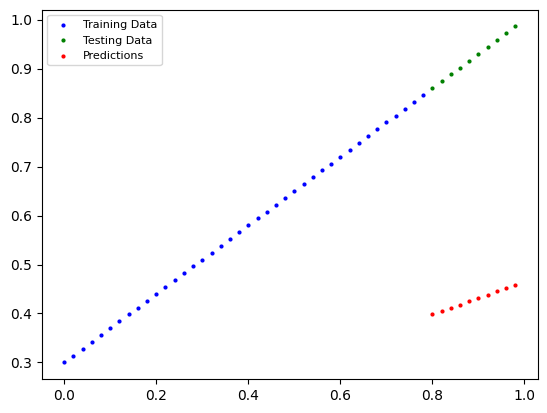

In [30]:
plot_predictions(predictions=y_preds) #we can see that our model is giving vvvvv varying values that our input/trained model

**TRAINING OUR MODEL**

in training we basically we train our model to move from some "Unknown parameters" to "known parameters"

We do this with the help of Loss Functions

**Loss Functions** tell how bad ur models predictions are, lower the better


**Optimizer** takes into account the loss of a model and adjusts the models parameters(weight,bias)

For Pytorch we need,


*   Training loop
*   Testing loop

There r many loss functions



In [34]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We now have to set up an optimizer

lr defines how big/small the optimizer changes the parameters with each step(small lr results in small changes,a large lr results in large changes)

In [37]:
loss_fn=nn.L1Loss()
 #There r many optimizers, we will used SGD model
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)
#The learning rate is a hyperparameter that determines the size of the steps taken during optimization.
#suppose the learning rate is 0.0001 it will effect the tensor value which was 0.3367 in such a way that only 7 in 0.3367 is effected



Which loss function and optimizer to use, it comes with experience


**BUILDING A TRAINING LOOP**

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss(ie resets to first step)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**Gradient descent**)

In [38]:
torch.manual_seed(42)
#An epoch is one loop through the data
epochs=1

# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

  #1.Forward pass

  y_pred=model_0(X_train)

  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train) #(prediction,true_values)

  # 3.Optimizer zero grad
  optimizer.zero_grad()

  #4.Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5.Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # turns off gradient tracking
